In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import cv2 
import numpy as np
from PIL import Image as im
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
v = []
h = []
n_images = 20
for i in range(n_images):
    for j in range(n_images):
        if j == 0:
            h.append(np.invert(x_train[n_images*i+j]))
        else:
            h[i] = np.concatenate((h[i], np.invert(x_train[n_images*i+j])), axis=1)
    if i == 0:
        v = h[0]
    else:
        v = np.concatenate((v, h[i]), axis=0)

cv2.imshow('VERTICAL', v) 
  
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [8]:
np.shape(x_train)

(60000, 784)

In [7]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0

## Build the Models

### Naive Bayes Classifier

In [9]:
model_m = MultinomialNB()
model_m.fit(x_train, y_train)

MultinomialNB()

In [10]:
pred_m = model_m.predict(x_test)

In [11]:
print(f"The accuracy score is {accuracy_score(y_test,pred_m)*100}%")

The accuracy score is 83.57%


In [12]:
print(classification_report(y_test, pred_m))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



In [13]:
print(confusion_matrix(y_test,pred_m))
#sns.heatmap(confusion_matrix(y_test,pred_m),cmap='viridis',annot=True);   

[[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    1    6    0   52    1]
 [  15   11  858   24   10    3   32   12   66    1]
 [   4   11   34  852    1   19    7   14   41   27]
 [   2    2    6    0  731    0   25    1   38  177]
 [  23   12    6  108   18  586   17    6   79   37]
 [  18   13   17    1    8   24  859    0   18    0]
 [   1   21   11    5   18    0    1  861   41   69]
 [   6   26   13   55   14   27    8    9  776   40]
 [   6    8    3   11   65    9    1   18   27  861]]


### K-Nearest Neighbors Classifier

In [14]:
model_k = KNeighborsClassifier()
model_k.fit(x_train,y_train)

KNeighborsClassifier()

In [15]:
pred_k = model_k.predict(x_test)

In [16]:
print(f"The accuracy score is {accuracy_score(y_test,pred_k)*100}%")

The accuracy score is 96.88%


In [17]:
print(classification_report(y_test, pred_k))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



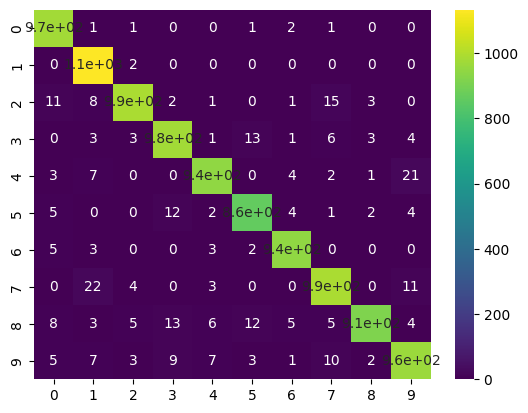

In [18]:
#print(confusion_matrix(y_test,pred_k))
sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);   

### Logistic Regression

In [19]:
model_lr = LogisticRegression(max_iter=1000, solver='lbfgs')

In [21]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
pred_lr = model_lr.predict(x_test)

In [23]:
print(f"The accuracy score is {accuracy_score(y_test,pred_lr)*100}%")

The accuracy score is 92.60000000000001%


### Random Forest Classifier 

In [26]:
model_rf = RandomForestClassifier()

In [27]:
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
pred_rf = model_rf.predict(x_test)

In [29]:
print(f"The accuracy score is {accuracy_score(y_test, pred_rf)*100}%")

The accuracy score is 96.96000000000001%


In [30]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [31]:
print(confusion_matrix(y_test,pred_rf))

[[ 972    0    1    0    0    1    2    1    3    0]
 [   0 1122    3    3    0    3    2    0    1    1]
 [   6    0 1000    5    2    0    3    9    7    0]
 [   0    0   12  972    0    6    0    9    8    3]
 [   1    0    1    0  951    0    6    1    2   20]
 [   2    0    0   11    3  857    8    3    6    2]
 [   6    3    0    0    3    3  939    0    4    0]
 [   1    3   20    2    1    0    0  990    2    9]
 [   4    0    5    9    3    4    4    4  931   10]
 [   6    5    2   10    9    4    1    5    5  962]]


### Support Vector Machine

In [12]:
from sklearn.svm import SVC
model_svc = SVC()

In [13]:
model_svc.fit(x_train, y_train)

SVC()

In [14]:
pred_svc = model_svc.predict(x_test)

In [15]:
print(f"The accuracy score is {accuracy_score(y_test, pred_svc)*100}%")

The accuracy score is 97.92%


### Gradient Boost Classifier

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()

In [17]:
model_gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [18]:
pred_gbc = model_gbc.predict(x_test)

In [19]:
print(f"The accuracy score is {accuracy_score(y_test, pred_gbc)*100}%")

The accuracy score is 94.59%


### XGBoost Classifier

In [21]:
import xgboost as xgb

In [22]:
model_xgb = xgb.XGBClassifier()

In [52]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
pred_xgb = model_xgb.predict(x_test)

In [54]:
print(f"The accuracy score is {accuracy_score(y_test, pred_xgb)*100}%")

The accuracy score is 97.95%


In [55]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [57]:
print(confusion_matrix(y_test,pred_xgb))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);  

[[ 970    1    0    0    0    2    3    1    2    1]
 [   1 1125    3    2    0    1    2    1    0    0]
 [   5    0 1008    7    2    0    0    6    3    1]
 [   1    0    3  990    0    3    0    6    4    3]
 [   0    0    2    1  958    0    4    0    2   15]
 [   2    1    0    5    0  872    4    3    3    2]
 [   5    3    1    0    2    4  940    0    3    0]
 [   1    1   13    1    2    0    0 1000    1    9]
 [   3    1    2    3    3    4    2    1  951    4]
 [   5    4    1    5    6    0    0    4    3  981]]


# Using CNN

In [61]:
from tensorflow.keras.callbacks import EarlyStopping
model_cnn = keras.Sequential(
    [
        keras.Input(shape=(784,)),# Notice the comma after 784 to specify a tuple with a single element
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(10),
    ]
)

In [62]:
print(model_cnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
model_cnn.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),#Try other optimizers like  Adagrade , Gradient decent with momentum ,RMSprop for diff accu
    metrics=["accuracy"],
)

In [64]:
# Define early stopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

model_cnn.fit(x_train,y_train,batch_size=32,epochs=10,verbose=2,callbacks=[early_stopping])

Epoch 1/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9437 - loss: 0.1870
Epoch 2/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9749 - loss: 0.0803
Epoch 3/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9830 - loss: 0.0542
Epoch 4/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9867 - loss: 0.0412
Epoch 5/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9901 - loss: 0.0315
Epoch 6/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9908 - loss: 0.0285
Epoch 7/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9920 - loss: 0.0234
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9936 - loss: 0.0196
Epoch 9/10
1875/1875 - 7s - 4ms/step - accuracy: 0.9938 - loss: 0.0196
Epoch 10/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9954 - loss: 0.0157


In [65]:
model_cnn.evaluate(x_test,y_test,batch_size=32,verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9797 - loss: 0.0949


[0.09489905834197998, 0.9797000288963318]

In [74]:
pred_cnn_arr = model_cnn.predict(x_test)
pred_cnn = np.argmax(pred_cnn_arr,axis = 1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [76]:
print(f"The accuracy score is {accuracy_score(y_test, pred_cnn)*100}%")

The accuracy score is 97.97%


In [77]:
print(classification_report(y_test, pred_cnn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      1.00      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [78]:
print(confusion_matrix(y_test,pred_cnn))
# sns.heatmap(confusion_matrix(y_test,pred_k),cmap='viridis',annot=True);  

[[ 972    1    0    2    1    0    2    2    0    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1   15  998    0    3    0    3    9    2    1]
 [   1    1    5  989    0    9    0    4    1    0]
 [   0    2    1    0  966    0    4    1    0    8]
 [   2    0    0    5    1  875    6    2    1    0]
 [   2    3    0    1    5    2  944    0    1    0]
 [   0    5    7    0    0    0    0 1014    1    1]
 [   4    2    5   12    3    7    3    3  933    2]
 [   1    3    1    0   15    5    1    8    3  972]]
